In [9]:
import pandas as pd
customer_info = pd.read_excel('data/会员信息查询.xlsx')

In [10]:
customer_info.head()

,会员卡号,会员等级,会员来源,注册时间,所属店铺编码,门店店员编码,省份,城市,性别,生日,年齡,生命级别
0,BL6099033963550303769,黄金会员,线下扫码,2019-03-31 23:55:03.977,DPXX07,NaN,NaN,NaN,女,1975-04-04,43.0,活跃
1,BL6099033963450303763,黄金会员,线下扫码,2019-03-31 23:45:03.005,DPXX07,NaN,NaN,NaN,女,1982-04-02,36.0,活跃
2,BL6099033963464003767,白银会员,电商入口,2019-03-31 23:42:40.073,DPS00X,NaN,NaN,NaN,女,1988-08-13,30.0,沉睡
3,BL6099033963460503766,黄金会员,线下扫码,2019-03-31 23:42:05.516,DPXX07,NaN,NaN,NaN,女,1993-11-24,25.0,活跃
4,BL6099033963660603765,白银会员,电商入口,2019-03-31 23:26:02.402,DPS00X,NaN,NaN,NaN,女,1993-03-20,26.0,沉睡


In [11]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952714 entries, 0 to 952713
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   会员卡号    952714 non-null  object        
 1   会员等级    952714 non-null  object        
 2   会员来源    952714 non-null  object        
 3   注册时间    952714 non-null  datetime64[ns]
 4   所属店铺编码  952714 non-null  object        
 5   门店店员编码  253828 non-null  object        
 6   省份      264801 non-null  object        
 7   城市      264758 non-null  object        
 8   性别      952714 non-null  object        
 9   生日      785590 non-null  object        
 10  年齡      952705 non-null  float64       
 11  生命级别    952714 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 87.2+ MB


## 按月统计会晕的存量和增量

In [12]:
customer_info.loc[:,'注册年月'] = customer_info['注册时间'].apply(lambda x:x.strftime('%Y-%m'))

In [13]:
customer_info

,会员卡号,会员等级,会员来源,注册时间,所属店铺编码,门店店员编码,省份,城市,性别,生日,年齡,生命级别,注册年月
0,BL6099033963550303769,黄金会员,线下扫码,2019-03-31 23:55:03.977,DPXX07,NaN,NaN,NaN,女,1975-04-04,43.0,活跃,2019-03
1,BL6099033963450303763,黄金会员,线下扫码,2019-03-31 23:45:03.005,DPXX07,NaN,NaN,NaN,女,1982-04-02,36.0,活跃,2019-03
2,BL6099033963464003767,白银会员,电商入口,2019-03-31 23:42:40.073,DPS00X,NaN,NaN,NaN,女,1988-08-13,30.0,沉睡,2019-03
3,BL6099033963460503766,黄金会员,线下扫码,2019-03-31 23:42:05.516,DPXX07,NaN,NaN,NaN,女,1993-11-24,25.0,活跃,2019-03
4,BL6099033963660603765,白银会员,电商入口,2019-03-31 23:26:02.402,DPS00X,NaN,NaN,NaN,女,1993-03-20,26.0,沉睡,2019-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
952709,HS346696JA9D,钻石会员,线下扫码,2017-08-03 00:00:00.000,DPX753,NaN,河北省,唐山市,女,1971-09-17,47.0,活跃,2017-08
952710,HS367073JA96,钻石会员,线下扫码,2017-08-03 00:00:00.000,DPX76X,NaN,四川省,成都市,女,1982-12-12,36.0,活跃,2017-08
952711,HS353666JAD9,钻石会员,线下扫码,2017-08-03 00:00:00.000,DPX765,NaN,NaN,NaN,女,1970-04-28,48.0,活跃,2017-08
952712,SB035933JA46,钻石会员,线下扫码,2017-08-03 00:00:00.000,DPX784,NaN,NaN,NaN,女,1968-03-09,51.0,互动,2017-08


In [14]:
month_count = customer_info.groupby('注册年月')[['会员卡号']].count()

In [23]:
month_count.columns = ['月增量']

<Axes: xlabel='注册年月'>

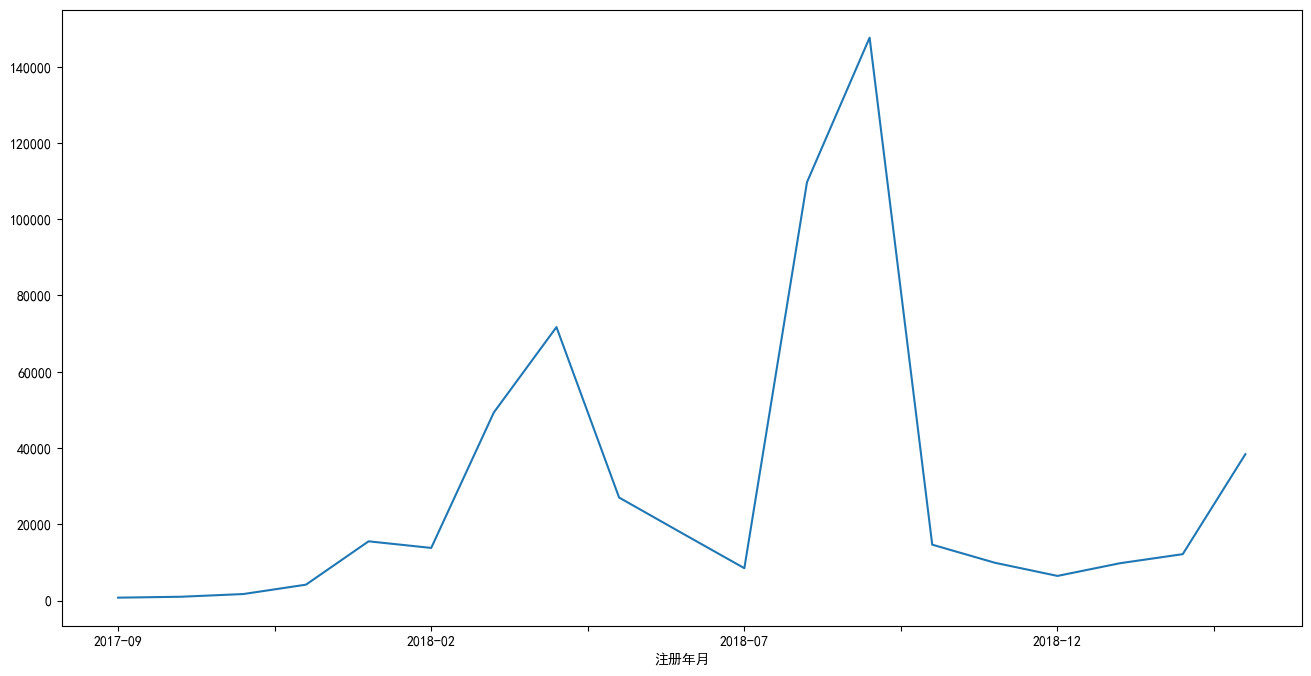

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 正常显示汉字
plt.rcParams['axes.unicode_minus'] = False # 正常显示负号
customer_info.groupby('注册年月')['会员卡号'].count()[1:].plot(figsize=(16,8))

In [21]:
# index 在透视表结果中, 哪一列数据作为行索引  columns 在透视表结果中, 哪一列数据作为列名 values 对哪一个字段进行统计 aggfunc 聚合方式
customer_info.pivot_table(index='注册年月',values='会员卡号',aggfunc='count')

,会员卡号
注册年月,
2017-08,392910
2017-09,760
2017-10,996
2017-11,1710
2017-12,4165
2018-01,15531
2018-02,13798
2018-03,49320
2018-04,71699


In [24]:
month_count.loc[:,'会员存量']=month_count['月增量'].cumsum()

<Axes: xlabel='注册年月'>

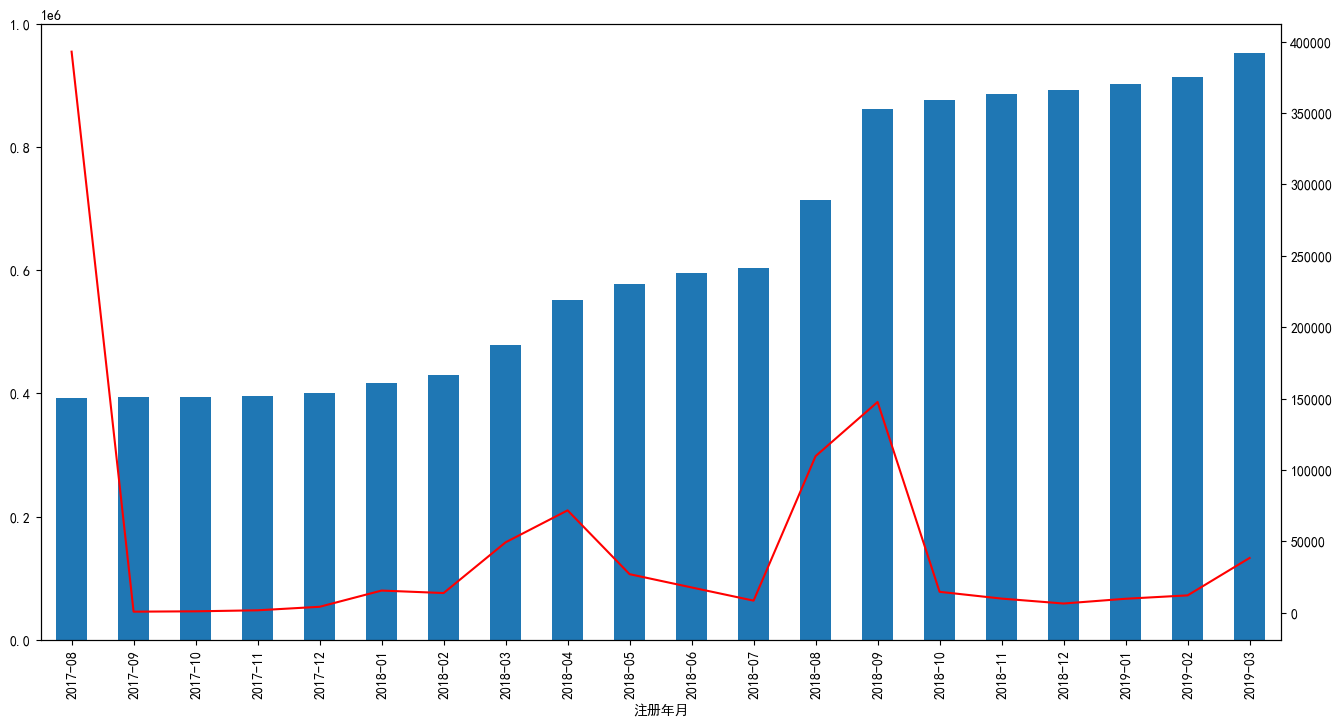

In [32]:
month_count['月增量'].plot(figsize=(16,8),color = 'red',secondary_y = True)
month_count['会员存量'].plot(kind = 'bar',figsize=(16,8))

## 统计月增量会员中的会员等级分布

In [37]:
customer_info.groupby(['注册年月','会员等级'])['会员卡号'].count().unstack()

会员等级,白银会员,钻石会员,铂金会员,黄金会员
注册年月,,,,
2017-08,376648,185,387,15690
2017-09,530,3,10,217
2017-10,603,13,17,363
2017-11,1311,19,20,360
2017-12,3512,15,24,614
2018-01,11244,24,64,4199
2018-02,9937,9,34,3818
2018-03,41546,57,94,7623
2018-04,62613,48,83,8955


In [70]:
member_level = customer_info.pivot_table(index='注册年月',columns='会员等级',values='会员卡号',aggfunc='count')
member_level = member_level[1:]

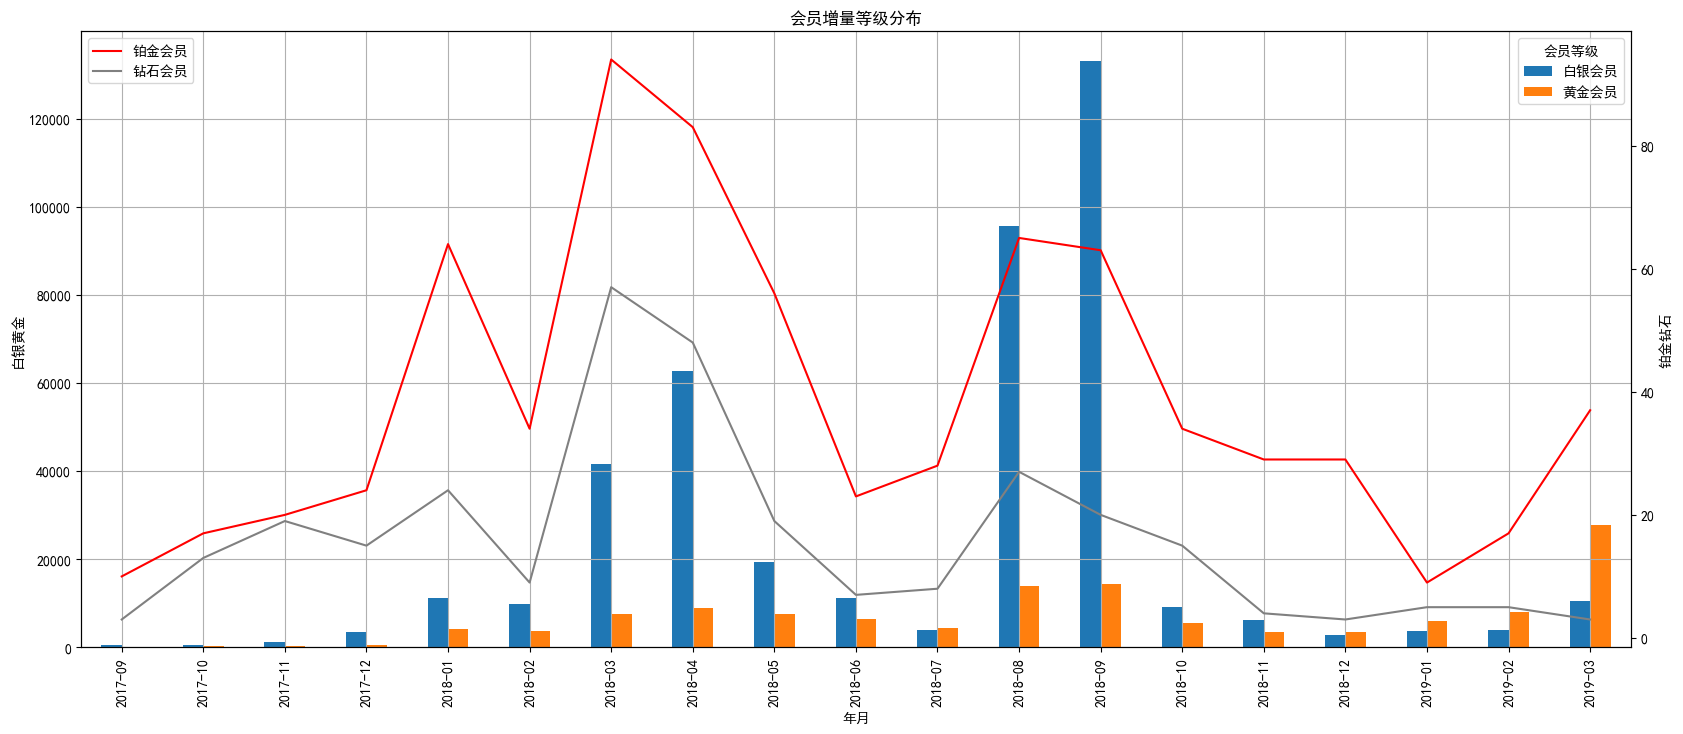

In [51]:
import matplotlib.pyplot as plt
fig,ax1 = plt.subplots(figsize=(20,8))
ax2 = ax1.twinx() # 通过ax1 创建了一个共享x轴的坐标系 ax2
# plt.subplots 创建了一个绘图区域 fig 和坐标系 ax1   grid=True 添加网格线  xlabel/ylabel x轴y轴 起名  legend 图例
member_level[['白银会员','黄金会员']].plot.bar(ax=ax1,grid=True,xlabel='年月',ylabel='白银黄金',legend= True)
member_level[['铂金会员','钻石会员']].plot(ax=ax2,color=['red','gray'],ylabel='铂金钻石',legend= True)
# 把ax2 坐标系 图例显示的地方调整到左上角
ax2.legend(loc='upper left')
plt.title('会员增量等级分布')
plt.show()

In [71]:
member_level.loc[:,'总计'] = member_level.sum(axis=1)
member_level

会员等级,白银会员,钻石会员,铂金会员,黄金会员,总计
注册年月,,,,,
2017-09,530,3,10,217,760
2017-10,603,13,17,363,996
2017-11,1311,19,20,360,1710
2017-12,3512,15,24,614,4165
2018-01,11244,24,64,4199,15531
2018-02,9937,9,34,3818,13798
2018-03,41546,57,94,7623,49320
2018-04,62613,48,83,8955,71699
2018-05,19317,19,56,7617,27009


In [72]:
member_level.loc[:,'白银会员占比'] = member_level['白银会员']/member_level['总计']
member_level.loc[:,'黄金会员占比'] = member_level['黄金会员']/member_level['总计']

In [73]:
member_level

会员等级,白银会员,钻石会员,铂金会员,黄金会员,总计,白银会员占比,黄金会员占比
注册年月,,,,,,,
2017-09,530,3,10,217,760,0.697368,0.285526
2017-10,603,13,17,363,996,0.605422,0.364458
2017-11,1311,19,20,360,1710,0.766667,0.210526
2017-12,3512,15,24,614,4165,0.843217,0.147419
2018-01,11244,24,64,4199,15531,0.723971,0.270363
2018-02,9937,9,34,3818,13798,0.720177,0.276707
2018-03,41546,57,94,7623,49320,0.842376,0.154562
2018-04,62613,48,83,8955,71699,0.873276,0.124897
2018-05,19317,19,56,7617,27009,0.715206,0.282017


<Axes: xlabel='注册年月', ylabel='占比'>

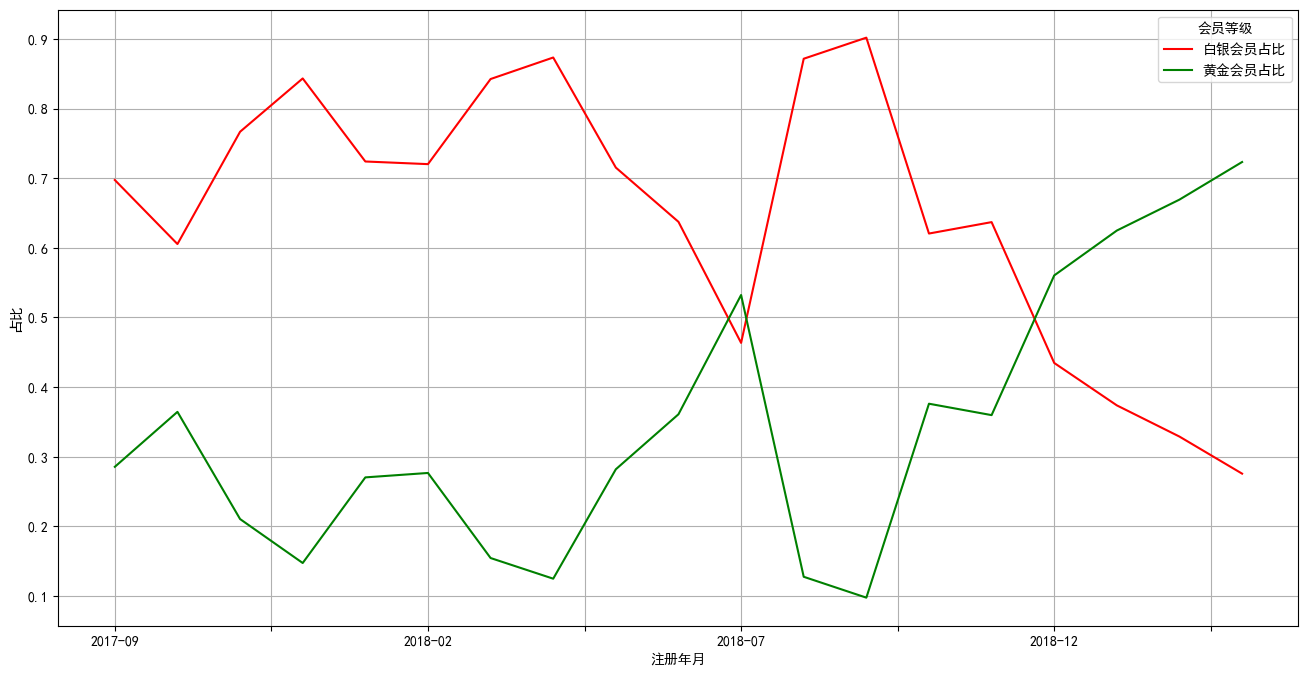

In [74]:
member_level[['白银会员占比','黄金会员占比']].plot(color=['r','g'],ylabel='占比',figsize=(16,8),grid=True)

## 整体等级分布

In [77]:
ratio = customer_info.groupby('会员等级')[['会员卡号']].count()

In [76]:
customer_info.pivot_table(index='会员等级',values='会员卡号',aggfunc='count')

,会员卡号
会员等级,
白银会员,807615
钻石会员,489
铂金会员,1123
黄金会员,143487


In [79]:
ratio.columns=['会员数']

In [80]:
ratio['占比'] = ratio['会员数']/ratio['会员数'].sum()

In [81]:
ratio

,会员数,占比
会员等级,,
白银会员,807615,0.847699
钻石会员,489,0.000513
铂金会员,1123,0.001179
黄金会员,143487,0.150609


<Axes: ylabel='占比'>

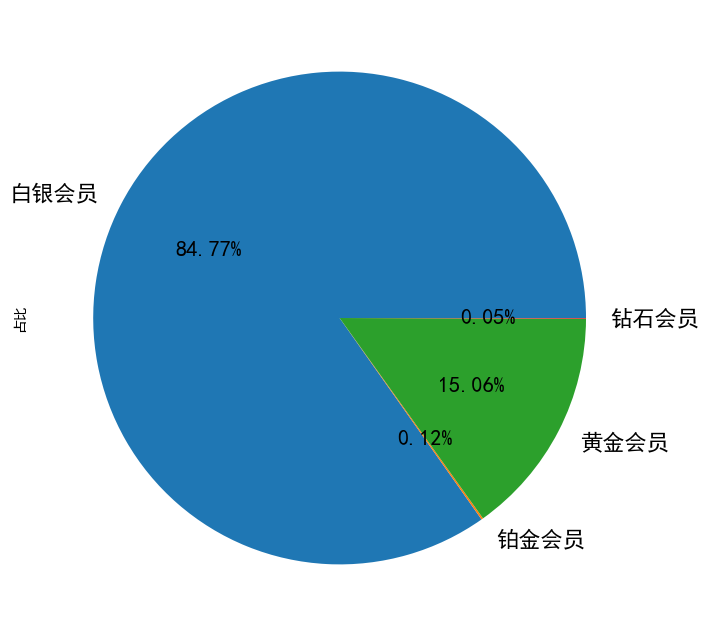

In [90]:
ratio.loc[['白银会员','铂金会员','黄金会员','钻石会员'],'占比'].plot.pie(figsize=(16,8),autopct='%.2f%%',fontsize=16)

## 线上线下会员增量分析

In [91]:
customer_info['会员来源'].value_counts()

线下扫码    881379
电商入口     71335
Name: 会员来源, dtype: int64

In [93]:
customer_info.groupby(['注册年月','会员来源'])['会员卡号'].count().unstack()

会员来源,电商入口,线下扫码
注册年月,,
2017-08,128,392782
2017-09,1,759
2017-10,1,995
2017-11,4,1706
2017-12,510,3655
2018-01,11739,3792
2018-02,10665,3133
2018-03,6652,42668
2018-04,3396,68303


In [95]:
online_offline = customer_info.pivot_table(index='注册年月',columns='会员来源',values='会员卡号',aggfunc='count')

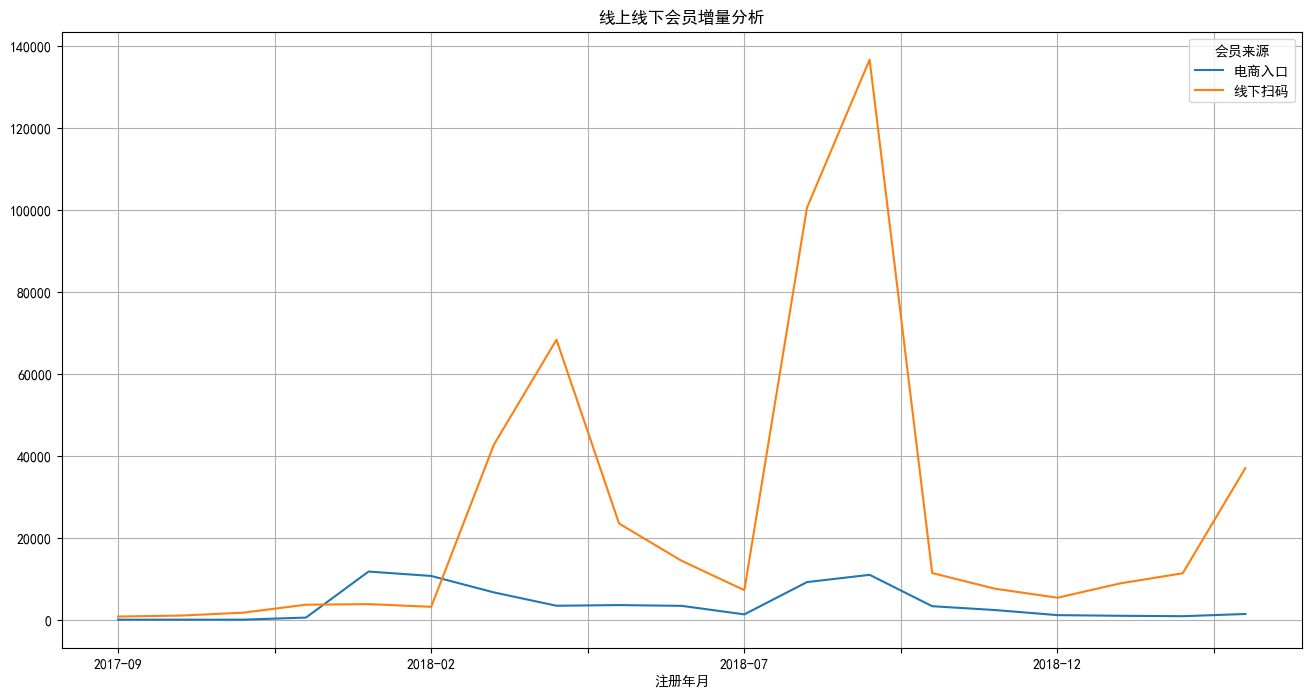

In [101]:
online_offline[1:].plot(figsize=(16,8),grid=True)
plt.title('线上线下会员增量分析')
plt.show()

In [102]:
customer_info

,会员卡号,会员等级,会员来源,注册时间,所属店铺编码,门店店员编码,省份,城市,性别,生日,年齡,生命级别,注册年月
0,BL6099033963550303769,黄金会员,线下扫码,2019-03-31 23:55:03.977,DPXX07,NaN,NaN,NaN,女,1975-04-04,43.0,活跃,2019-03
1,BL6099033963450303763,黄金会员,线下扫码,2019-03-31 23:45:03.005,DPXX07,NaN,NaN,NaN,女,1982-04-02,36.0,活跃,2019-03
2,BL6099033963464003767,白银会员,电商入口,2019-03-31 23:42:40.073,DPS00X,NaN,NaN,NaN,女,1988-08-13,30.0,沉睡,2019-03
3,BL6099033963460503766,黄金会员,线下扫码,2019-03-31 23:42:05.516,DPXX07,NaN,NaN,NaN,女,1993-11-24,25.0,活跃,2019-03
4,BL6099033963660603765,白银会员,电商入口,2019-03-31 23:26:02.402,DPS00X,NaN,NaN,NaN,女,1993-03-20,26.0,沉睡,2019-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
952709,HS346696JA9D,钻石会员,线下扫码,2017-08-03 00:00:00.000,DPX753,NaN,河北省,唐山市,女,1971-09-17,47.0,活跃,2017-08
952710,HS367073JA96,钻石会员,线下扫码,2017-08-03 00:00:00.000,DPX76X,NaN,四川省,成都市,女,1982-12-12,36.0,活跃,2017-08
952711,HS353666JAD9,钻石会员,线下扫码,2017-08-03 00:00:00.000,DPX765,NaN,NaN,NaN,女,1970-04-28,48.0,活跃,2017-08
952712,SB035933JA46,钻石会员,线下扫码,2017-08-03 00:00:00.000,DPX784,NaN,NaN,NaN,女,1968-03-09,51.0,互动,2017-08


## 按地区统计会员数量

In [104]:
store_info = pd.read_excel('data/门店信息表.xlsx')

In [105]:
store_info.head()

,店铺代码,地区编码,渠道大类,商圈等级描述,商圈类别描述,店铺位置,店铺状态,仓储类别,营业员数,仓储面积,店铺等级,店铺时尚度,接受价格等级,店铺类型,装修代数
0,DPX00X,GBL6020,DZ01,流行,中心,1F中岛,A,店外仓,2.0,15,A,2.0,中,1.0,8代
1,DPX002,GBL6020,DZ01,流行,中心,1F中岛,A,店外仓,2.0,17,A,1.0,中,1.0,7代
2,DPX003,GBL6020,DZ01,流行,中心,2F中岛,A,店外仓,2.0,10,B,2.0,中,1.0,7代
3,DPX004,GBL6020,DZ01,流行,新兴,1F边厅,A,店外仓,2.0,13,B,2.0,中,1.0,7代
4,DPX005,GBL6020,DZ01,流行,中心,1F边厅,A,店外仓,3.0,9,B,1.0,中,1.0,7代


In [106]:
store_info.describe()

,营业员数,店铺时尚度,店铺类型
count,784.000000,773.000000,768.000000
mean,3.156888,2.456662,1.167969
std,0.828687,0.775097,0.643220
min,2.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000
50%,3.000000,3.000000,1.000000
75%,4.000000,3.000000,1.000000
max,8.000000,3.000000,4.000000


In [109]:
customer_info1 = customer_info.merge(store_info[['店铺代码','地区编码']],left_on='所属店铺编码',right_on='店铺代码',how='left')

In [107]:
customer_info['所属店铺编码'].value_counts()

DPS00X    71323
DPX36X     6460
DPX7X4     6422
DPX772     5800
DPX7X5     5493
          ...  
DPX207        1
DPL3XX        1
DPX289        1
DPJ0X9        1
DPX804        1
Name: 所属店铺编码, Length: 755, dtype: int64

In [112]:
customer_info.shape

(952714, 13)

In [114]:
customer_info1.head()

,会员卡号,会员等级,会员来源,注册时间,所属店铺编码,门店店员编码,省份,城市,性别,生日,年齡,生命级别,注册年月,店铺代码,地区编码
0,BL6099033963550303769,黄金会员,线下扫码,2019-03-31 23:55:03.977,DPXX07,NaN,NaN,NaN,女,1975-04-04,43.0,活跃,2019-03,DPXX07,GBL6030
1,BL6099033963450303763,黄金会员,线下扫码,2019-03-31 23:45:03.005,DPXX07,NaN,NaN,NaN,女,1982-04-02,36.0,活跃,2019-03,DPXX07,GBL6030
2,BL6099033963464003767,白银会员,电商入口,2019-03-31 23:42:40.073,DPS00X,NaN,NaN,NaN,女,1988-08-13,30.0,沉睡,2019-03,DPS00X,GBL6D01
3,BL6099033963460503766,黄金会员,线下扫码,2019-03-31 23:42:05.516,DPXX07,NaN,NaN,NaN,女,1993-11-24,25.0,活跃,2019-03,DPXX07,GBL6030
4,BL6099033963660603765,白银会员,电商入口,2019-03-31 23:26:02.402,DPS00X,NaN,NaN,NaN,女,1993-03-20,26.0,沉睡,2019-03,DPS00X,GBL6D01


In [117]:
# 统计每个地区会员数量
customer_info2 = customer_info1[customer_info1['地区编码']!='GBL6D01']

In [119]:
district_count = customer_info2.groupby('地区编码')[['会员卡号']].count()
district_count.columns =['会员数量']

In [120]:
district_count

,会员数量
地区编码,
GBL6010,51745
GBL6020,46945
GBL6030,112114
GBL6040,63426
GBL6050,50474
GBL6060,74447
GBL6070,147804
GBL6080,66750
GBL6090,66685


In [124]:
district_shop_count = customer_info2[['地区编码','所属店铺编码']].drop_duplicates().groupby('地区编码')['所属店铺编码'].count()

In [126]:
district_shop_count.name = '店铺数量'

In [132]:
district = pd.concat([district_count,district_shop_count],axis=1)

In [131]:
district_count.join(district_shop_count)

,会员数量,店铺数量
地区编码,,
GBL6010,51745,40
GBL6020,46945,41
GBL6030,112114,78
GBL6040,63426,47
GBL6050,50474,38
GBL6060,74447,31
GBL6070,147804,114
GBL6080,66750,70
GBL6090,66685,66


In [137]:
district['地区店均会员数'] = round(district['会员数量'].div(district['店铺数量']))

In [141]:
district['总平均会员数'] = round(district['会员数量'].sum()/district['店铺数量'].sum())

In [143]:
district = district.sort_values(by='地区店均会员数',ascending=False)

In [144]:
district

,会员数量,店铺数量,地区店均会员数,总平均会员数
地区编码,,,,
GBL6060,74447,31,2402.0,1174
GBL6030,112114,78,1437.0,1174
GBL6040,63426,47,1349.0,1174
GBL6050,50474,38,1328.0,1174
GBL6070,147804,114,1297.0,1174
GBL6010,51745,40,1294.0,1174
GBL6100,43695,38,1150.0,1174
GBL6020,46945,41,1145.0,1174
GBL6110,48547,46,1055.0,1174


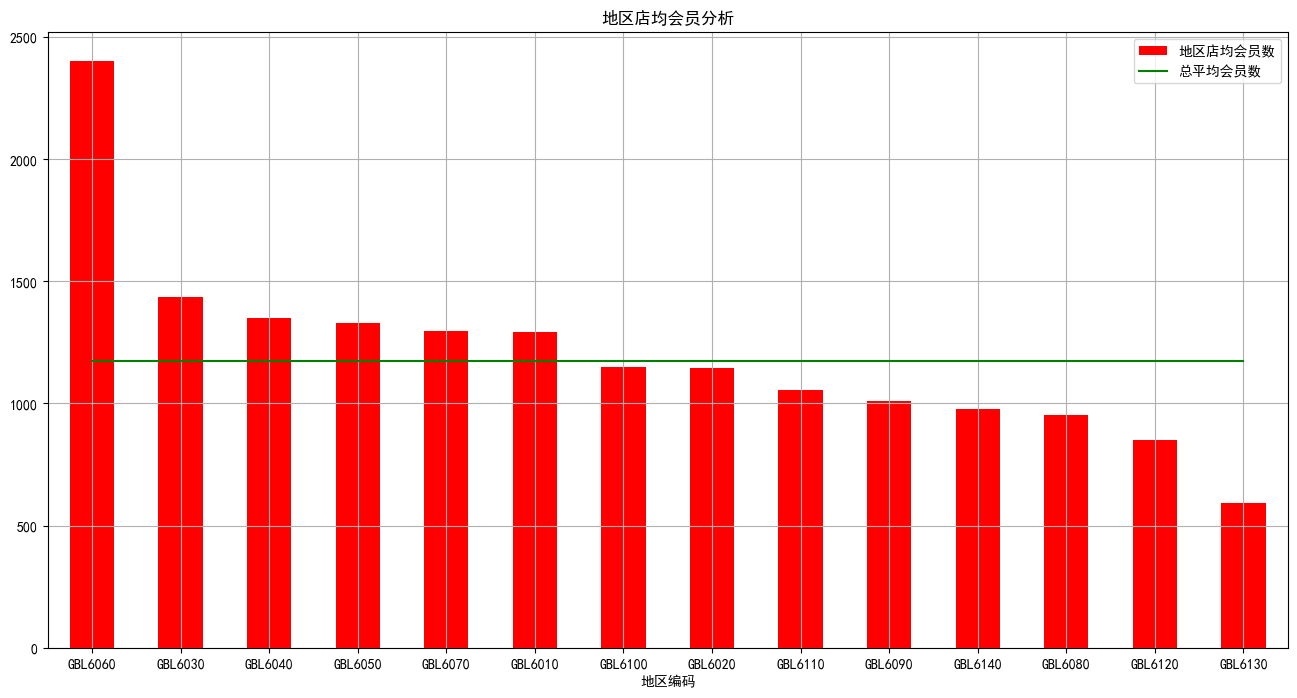

In [146]:
district['地区店均会员数'].plot.bar(figsize=(16,8),color='r',legend=True,grid=True)
district['总平均会员数'].plot(color='g',legend=True,grid=True)
plt.title('地区店均会员分析')
plt.show()

## 计算各地区会销比

In [ ]:
# 会销比 = 会员消费的订单数 / 全部销售订单数

In [147]:
custom_consume=pd.read_excel('data/会员消费报表.xlsx')
all_orders=pd.read_excel('data/全国销售订单数量表.xlsx')

In [152]:
custom_consume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203437 entries, 0 to 203436
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   卡号      203437 non-null  object 
 1   订单日期    203437 non-null  object 
 2   订单号     203437 non-null  object 
 3   订单类型    203437 non-null  object 
 4   店铺代码    203437 non-null  object 
 5   款号      203437 non-null  object 
 6   尺码      203437 non-null  int64  
 7   消费数量    203437 non-null  int64  
 8   消费金额    203437 non-null  float64
 9   当前积分    203437 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 15.5+ MB


In [154]:
custom_consume['订单日期'] = pd.to_datetime(custom_consume['订单日期'])
custom_consume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203437 entries, 0 to 203436
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   卡号      203437 non-null  object        
 1   订单日期    203437 non-null  datetime64[ns]
 2   订单号     203437 non-null  object        
 3   订单类型    203437 non-null  object        
 4   店铺代码    203437 non-null  object        
 5   款号      203437 non-null  object        
 6   尺码      203437 non-null  int64         
 7   消费数量    203437 non-null  int64         
 8   消费金额    203437 non-null  float64       
 9   当前积分    203437 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 15.5+ MB


In [157]:
 custom_consume['订单日期'].apply(lambda x: x.strftime('%Y%m')).astype(int)

0         201811
1         201811
2         201811
3         201811
4         201811
           ...  
203432    201901
203433    201901
203434    201901
203435    201901
203436    201901
Name: 订单日期, Length: 203437, dtype: int32

In [158]:
custom_consume['年月'] = custom_consume['订单日期'].apply(lambda x: x.strftime('%Y%m')).astype(int)

In [151]:
all_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   年月      8500 non-null   int64  
 1   地区代码    8500 non-null   object 
 2   店铺代码    8500 non-null   object 
 3   全部订单数   8500 non-null   int64  
 4   会员订单数   5252 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 332.2+ KB


In [159]:
store_info.columns

Index(['店铺代码', '地区编码', '渠道大类', '商圈等级描述', '商圈类别描述', '店铺位置', '店铺状态', '仓储类别',
       '营业员数', '仓储面积', '店铺等级', '店铺时尚度', '接受价格等级', '店铺类型', '装修代数'],
      dtype='object')

In [160]:
custom_consume.columns

Index(['卡号', '订单日期', '订单号', '订单类型', '店铺代码', '款号', '尺码', '消费数量', '消费金额', '当前积分',
       '年月'],
      dtype='object')

In [165]:
# 计算各地区会销比
member_orders = custom_consume.merge(store_info[['店铺代码','地区编码']],on='店铺代码',how='left')
member_orders =member_orders[member_orders['地区编码']!='GBL6D01']

In [174]:
area_sales= member_orders.pivot_table(index='地区编码',columns='年月',values='消费数量',aggfunc=sum,margins=True,margins_name='汇总')
area_sales

年月,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,汇总
地区编码,,,,,,,,,,,,,,
GBL6010,127,74,145,113,70,35,45,82,56,61,51,43,253,1155
GBL6020,15,31,15,5,499,593,90,980,588,80,8,55,291,3250
GBL6030,1989,1503,2572,3264,4079,4023,3349,4434,5198,3499,2386,2725,3660,42681
GBL6040,432,622,671,753,938,598,662,1259,1206,516,442,404,628,9131
GBL6050,522,618,1007,1771,2420,1770,1491,1428,1218,927,744,783,1151,15850
GBL6060,431,453,600,535,756,634,651,763,707,270,167,122,156,6245
GBL6070,1018,879,1106,1203,1248,1172,1081,1993,2917,1408,1063,1129,1408,17625
GBL6080,10,9,16,4,91,53,23,1221,1120,121,47,49,670,3434
GBL6090,326,342,541,629,606,436,331,1217,1564,809,646,445,440,8332


In [175]:
country_sales = all_orders.pivot_table(index='地区代码',columns='年月',values='全部订单数',aggfunc=sum,margins=True,margins_name='汇总')
country_sales

年月,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,汇总
地区代码,,,,,,,,,,,,,,
GBL6010,6313,7576,7736,10455,12881,9287,8162,8151,6190,5500,5894,5313,6643,100101
GBL6020,8038,10076,9776,11758,14248,10947,11335,9291,8847,6927,5618,6407,8257,121525
GBL6030,16380,16995,23606,22201,22584,17215,15608,14297,17721,15831,15377,13350,14858,226023
GBL6040,9284,12724,10448,12882,12682,10219,11490,11598,10083,9082,6787,7214,10404,134897
GBL6050,3334,4849,4443,5911,6589,5264,4483,4278,4666,3743,3926,3372,5067,59925
GBL6060,2848,3847,5225,6018,6509,4810,4594,4148,4511,3906,3295,2766,3209,55686
GBL6070,14375,17605,22083,24989,26511,21979,18659,17956,22618,19918,14078,13658,16146,250575
GBL6080,6880,6733,8870,11386,13312,11234,8989,8552,10817,10301,11182,10015,10407,128678
GBL6090,5095,6562,10346,8907,9933,8107,7304,8297,9748,9287,7405,6033,6426,103450


In [177]:
(area_sales/country_sales).max()

年月
201801    0.156569
201802    0.150265
201803    0.226649
201804    0.299611
201805    0.367279
201806    0.336246
201807    0.332590
201808    0.549952
201809    0.467483
201810    0.300883
201811    0.269581
201812    0.522207
201901    0.594402
汇总        0.265744
dtype: float64

In [178]:
area_sales/country_sales

年月,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,汇总
地区编码,,,,,,,,,,,,,,
GBL6010,0.020117,0.009768,0.018744,0.010808,0.005434,0.003769,0.005513,0.010060,0.009047,0.011091,0.008653,0.008093,0.038085,0.011538
GBL6020,0.001866,0.003077,0.001534,0.000425,0.035022,0.054170,0.007940,0.105478,0.066463,0.011549,0.001424,0.008584,0.035243,0.026743
GBL6030,0.121429,0.088438,0.108955,0.147020,0.180615,0.233692,0.214569,0.310135,0.293324,0.221022,0.155167,0.204120,0.246332,0.188835
GBL6040,0.046532,0.048884,0.064223,0.058454,0.073963,0.058518,0.057615,0.108553,0.119607,0.056816,0.065125,0.056002,0.060361,0.067689
GBL6050,0.156569,0.127449,0.226649,0.299611,0.367279,0.336246,0.332590,0.333801,0.261037,0.247662,0.189506,0.232206,0.227156,0.264497
GBL6060,0.151334,0.117754,0.114833,0.088900,0.116147,0.131809,0.141707,0.183944,0.156728,0.069124,0.050683,0.044107,0.048613,0.112147
GBL6070,0.070817,0.049929,0.050084,0.048141,0.047075,0.053324,0.057935,0.110994,0.128968,0.070690,0.075508,0.082662,0.087204,0.070338
GBL6080,0.001453,0.001337,0.001804,0.000351,0.006836,0.004718,0.002559,0.142774,0.103541,0.011746,0.004203,0.004893,0.064380,0.026687
GBL6090,0.063984,0.052118,0.052291,0.070619,0.061009,0.053781,0.045318,0.146680,0.160443,0.087111,0.087238,0.073761,0.068472,0.080541


In [181]:
member_count = customer_info.groupby('注册年月')['会员卡号'].count()

In [182]:
member_count.columns = ['会员数量']

In [184]:
member_count.to_frame()

,会员卡号
注册年月,
2017-08,392910
2017-09,760
2017-10,996
2017-11,1710
2017-12,4165
2018-01,15531
2018-02,13798
2018-03,49320
2018-04,71699


In [185]:
member_count

注册年月
2017-08    392910
2017-09       760
2017-10       996
2017-11      1710
2017-12      4165
2018-01     15531
2018-02     13798
2018-03     49320
2018-04     71699
2018-05     27009
2018-06     17718
2018-07      8483
2018-08    109674
2018-09    147585
2018-10     14654
2018-11      9912
2018-12      6460
2019-01      9795
2019-02     12163
2019-03     38372
Name: 会员卡号, dtype: int64